In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
%pwd
!ls

challenge.ipynb  data  README.md


# Getting familiar with the Data

## Order Products

In [2]:
orders_p = pd.read_csv('data/order_products.csv')
orders_p.head()

,order_id,product_id,quantity,buy_unit
0,47099653730fb1b76537fc10ad876255,c1244453d731c77416cb4766e3bd76cb,1.0,UN
1,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.0,KG
2,f26d16bf6f38c9e31d0be877f4013a9e,b8f880759d014134e272d881d49989a2,1.0,UN
3,161ccc896835ab41761b0e726becb6b1,dbc062b9bef805d27a6f4bea7edfe1f1,1.0,UN
4,4713deca10bb5db98fae150b52d61fc0,93a060f269bb569398921100f84c519a,2.0,UN


In [3]:
print('Numero total de ordenes:', len(orders_p.order_id.unique().tolist()),'\n','\n')
orders_p.info()

Numero total de ordenes: 9978 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198500 entries, 0 to 198499
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   order_id    198500 non-null  object 
 1   product_id  198500 non-null  object 
 2   quantity    198500 non-null  float64
 3   buy_unit    198500 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.1+ MB


In [4]:
orders_p2 = pd.pivot_table(orders_p, values='quantity', index=['order_id'],
                    columns=['buy_unit'], aggfunc=np.sum)
orders_p2 = orders_p2.fillna(0).reset_index()
orders_p2

buy_unit,order_id,KG,UN
0,0004a3841c1eeb6c6e77585a941c21e0,0.000,8.0
1,0005a6ecbbde1e8d273f5577bcff2c9c,0.000,2.0
2,0007baeb6700fc203be2d1f1e11222d7,0.000,39.0
3,0012195a6a8ca9ec308a3010eeea8ebc,0.000,13.0
4,0013011fa72b498b9feb84f4e7104980,1.636,63.0
...,...,...,...
9973,ffc3234b2e009e5422a4b5e24961c038,5.100,13.0
9974,ffcc66cd4d1056b67523a39ff07d7700,4.015,68.0
9975,ffcf270be4bba33349ce827c70fe9439,0.332,52.0
9976,ffdbc12cfcf7101a517a7eb7e1776c43,3.602,36.0


## Shopper

In [8]:
shopper = pd.read_csv('data/shoppers.csv')
shopper.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,1fc20b0bdf697ac13dd6a15cbd2fe60a,41dc7c9e385c4d2b6c1f7836973951bf,0.8606,1.94,1.00,4.87
1,e1c679ac73a69c01981fdd3c5ab8beda,6c90661e6d2c7579f5ce337c3391dbb9,0.8446,1.23,0.92,4.92
2,09d369c66ca86ebeffacb133410c5ee1,6c90661e6d2c7579f5ce337c3391dbb9,0.8559,1.56,1.00,4.88
3,db39866e62b95bb04ebb1e470f2d1347,50e13ee63f086c2fe84229348bc91b5b,NaN,2.41,NaN,NaN
4,8efbc238660053b19f00ca431144fdae,6c90661e6d2c7579f5ce337c3391dbb9,0.8770,1.31,0.92,4.88


In [7]:
print('Numero total de shoppers:', len(shopper.shopper_id.unique().tolist()),'\n','\n')
shopper.info()

Numero total de shoppers: 2864 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopper_id     2864 non-null   object 
 1   seniority      2864 non-null   object 
 2   found_rate     2763 non-null   float64
 3   picking_speed  2864 non-null   float64
 4   accepted_rate  2837 non-null   float64
 5   rating         2780 non-null   float64
dtypes: float64(4), object(2)
memory usage: 134.4+ KB


In [8]:
## observamos que variables tienen NaN
shopper.isnull().sum().sort_values(ascending=False)

found_rate       101
rating            84
accepted_rate     27
picking_speed      0
seniority          0
shopper_id         0
dtype: int64

In [9]:
new_seniority = {'41dc7c9e385c4d2b6c1f7836973951bf': 1, 
                '50e13ee63f086c2fe84229348bc91b5b': 2,
                '6c90661e6d2c7579f5ce337c3391dbb9': 3,
                'bb29b8d0d196b5db5a5350e5e3ae2b1f': 4}

shopper['new_seniority'] = shopper.seniority.map(new_seniority)
shopper

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating,new_seniority
0,1fc20b0bdf697ac13dd6a15cbd2fe60a,41dc7c9e385c4d2b6c1f7836973951bf,0.8606,1.94,1.00,4.87,1
1,e1c679ac73a69c01981fdd3c5ab8beda,6c90661e6d2c7579f5ce337c3391dbb9,0.8446,1.23,0.92,4.92,3
2,09d369c66ca86ebeffacb133410c5ee1,6c90661e6d2c7579f5ce337c3391dbb9,0.8559,1.56,1.00,4.88,3
3,db39866e62b95bb04ebb1e470f2d1347,50e13ee63f086c2fe84229348bc91b5b,NaN,2.41,NaN,NaN,2
4,8efbc238660053b19f00ca431144fdae,6c90661e6d2c7579f5ce337c3391dbb9,0.8770,1.31,0.92,4.88,3
...,...,...,...,...,...,...,...
2859,da24da1311f7913f6d2d29d8238b439c,6c90661e6d2c7579f5ce337c3391dbb9,0.8951,1.53,0.88,4.80,3
2860,cf95eda5ffc1d4b9586de2ca08ab40f8,50e13ee63f086c2fe84229348bc91b5b,0.8695,3.00,0.56,5.00,2
2861,e8482e3ad8bc820ec756566a472b84b1,6c90661e6d2c7579f5ce337c3391dbb9,0.9152,1.47,0.88,4.96,3
2862,a55a3765a02530a97eb9af7aee327486,6c90661e6d2c7579f5ce337c3391dbb9,0.8695,1.20,0.96,4.80,3


In [10]:
shopper.groupby('new_seniority').count().reset_index()

,new_seniority,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,1,440,440,432,440,440,438
1,2,719,719,680,719,714,686
2,3,1643,1643,1643,1643,1643,1642
3,4,62,62,8,62,40,14


Text(0.5, 1.0, 'Seniority 4')

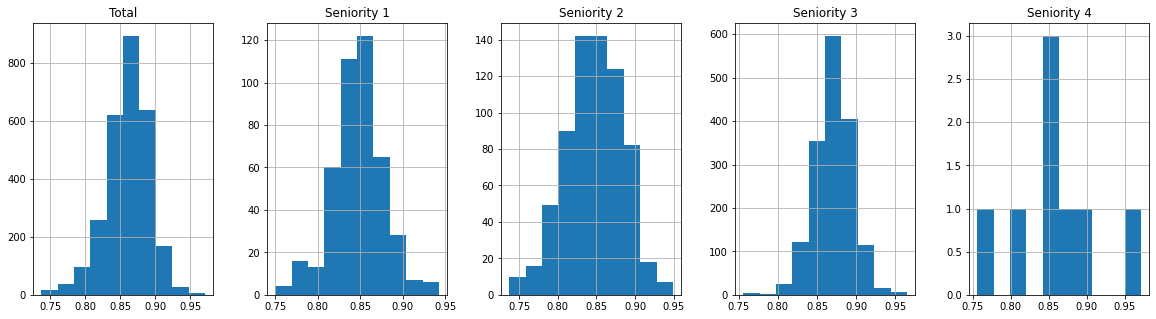

In [114]:
## Found rate distribution
fig, axes = plt.subplots(1, 5,figsize=(20,5))
shopper.hist('found_rate',bins=10,ax= axes[0])
shopper[shopper['new_seniority']==1].hist('found_rate',bins=10,ax= axes[1])
shopper[shopper['new_seniority']==2].hist('found_rate',bins=10,ax= axes[2])
shopper[shopper['new_seniority']==3].hist('found_rate',bins=10,ax= axes[3])
shopper[shopper['new_seniority']==4].hist('found_rate',bins=10,ax= axes[4])
axes[0].set_title('Total')
axes[1].set_title('Seniority 1')
axes[2].set_title('Seniority 2')
axes[3].set_title('Seniority 3')
axes[4].set_title('Seniority 4')


Text(0.5, 1.0, 'Seniority 4')

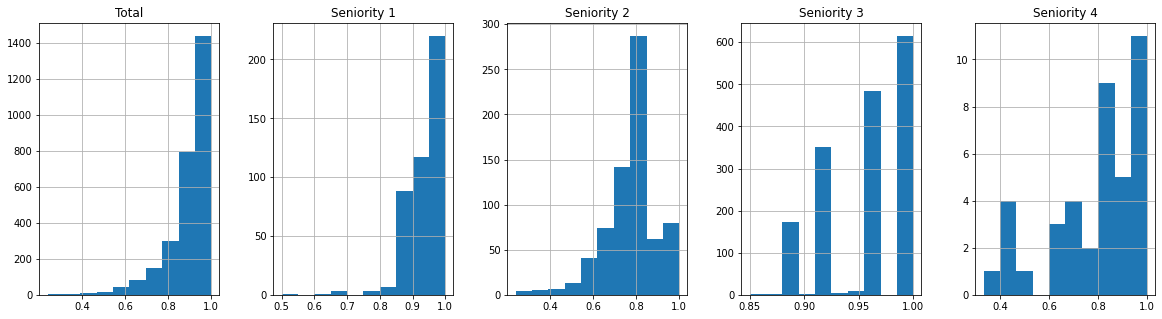

In [116]:
## acceptance rate
## Found rate distribution
fig, axes = plt.subplots(1, 5,figsize=(20,5))
shopper.hist('accepted_rate',bins=10,ax= axes[0])
shopper[shopper['new_seniority']==1].hist('accepted_rate',bins=10,ax= axes[1])
shopper[shopper['new_seniority']==2].hist('accepted_rate',bins=10,ax= axes[2])
shopper[shopper['new_seniority']==3].hist('accepted_rate',bins=10,ax= axes[3])
shopper[shopper['new_seniority']==4].hist('accepted_rate',bins=10,ax= axes[4])
axes[0].set_title('Total')
axes[1].set_title('Seniority 1')
axes[2].set_title('Seniority 2')
axes[3].set_title('Seniority 3')
axes[4].set_title('Seniority 4')


Text(0.5, 1.0, 'Seniority 4')

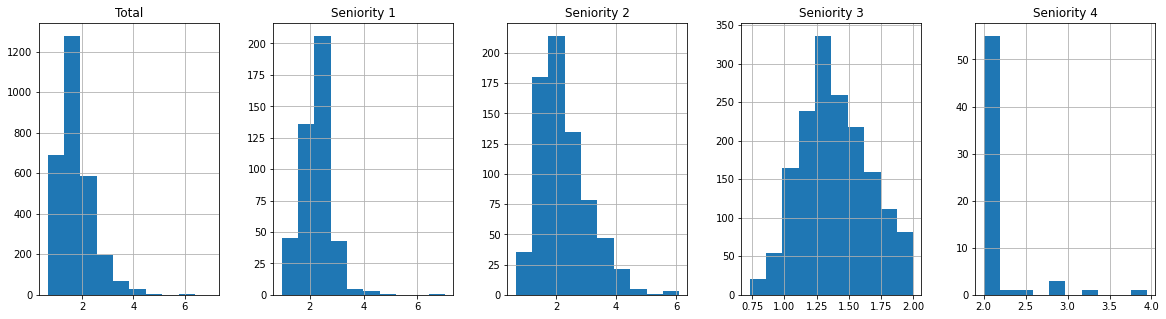

In [117]:
## Found rate distribution
fig, axes = plt.subplots(1, 5,figsize=(20,5))
shopper.hist('picking_speed',bins=10,ax= axes[0])
shopper[shopper['new_seniority']==1].hist('picking_speed',bins=10,ax= axes[1])
shopper[shopper['new_seniority']==2].hist('picking_speed',bins=10,ax= axes[2])
shopper[shopper['new_seniority']==3].hist('picking_speed',bins=10,ax= axes[3])
shopper[shopper['new_seniority']==4].hist('picking_speed',bins=10,ax= axes[4])
axes[0].set_title('Total')
axes[1].set_title('Seniority 1')
axes[2].set_title('Seniority 2')
axes[3].set_title('Seniority 3')
axes[4].set_title('Seniority 4')

Text(0.5, 1.0, 'Seniority 4')

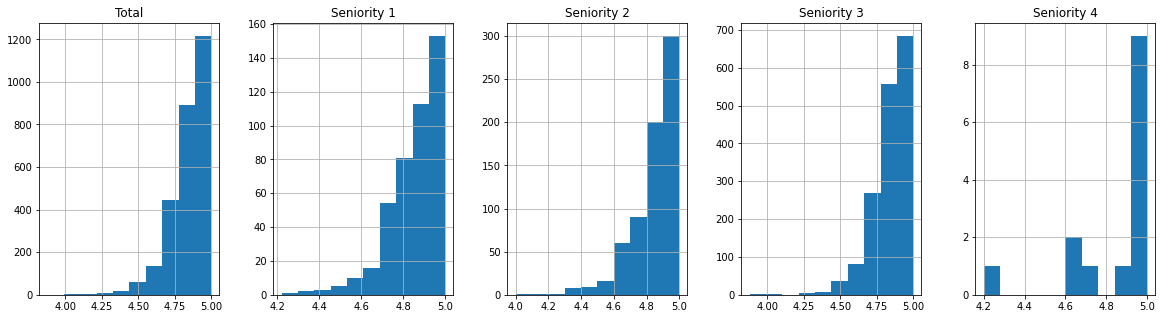

In [118]:
## Found rate distribution
fig, axes = plt.subplots(1, 5,figsize=(20,5))
shopper.hist('rating',bins=10,ax= axes[0])
shopper[shopper['new_seniority']==1].hist('rating',bins=10,ax= axes[1])
shopper[shopper['new_seniority']==2].hist('rating',bins=10,ax= axes[2])
shopper[shopper['new_seniority']==3].hist('rating',bins=10,ax= axes[3])
shopper[shopper['new_seniority']==4].hist('rating',bins=10,ax= axes[4])
axes[0].set_title('Total')
axes[1].set_title('Seniority 1')
axes[2].set_title('Seniority 2')
axes[3].set_title('Seniority 3')
axes[4].set_title('Seniority 4')

In [11]:
## NAN per column and shopper seniority
a = shopper.groupby('new_seniority').count().reset_index()
a['found_rate_nan'] = a['shopper_id'] - a['found_rate']
a['accepted_rate_nan'] = a.shopper_id - a.accepted_rate
a['rating_nan'] = a.shopper_id - a.rating
a
#sns.barplot(x='seniority', y='shopper_id', data=a)

,new_seniority,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating,found_rate_nan,accepted_rate_nan,rating_nan
0,1,440,440,432,440,440,438,8,0,2
1,2,719,719,680,719,714,686,39,5,33
2,3,1643,1643,1643,1643,1643,1642,0,0,1
3,4,62,62,8,62,40,14,54,22,48


In [12]:
# Statatistics for level of seniority
a = shopper.groupby('new_seniority').agg({'shopper_id':'count',
                                  'found_rate':['mean','median','std'],
                                  'picking_speed':['mean','median','std'],
                                  'accepted_rate':['mean','median','std'],
                                  'rating':['mean','median','std']}).reset_index()
a

new_seniority shopper_id found_rate                    picking_speed         \
                     count       mean   median       std          mean median   
0             1        440   0.847290  0.84765  0.030172      2.239227   2.22   
1             2        719   0.846542  0.84765  0.036801      2.272156   2.17   
2             3       1643   0.870753  0.87190  0.023945      1.392307   1.37   
3             4         62   0.855525  0.85130  0.062806      2.274032   2.19   

            accepted_rate                        rating                   
        std          mean    median       std      mean median       std  
0  0.554820      0.935696  0.947222  0.057484  4.865571   4.88  0.126178  
1  0.822574      0.784855  0.800000  0.126644  4.843834   4.88  0.144258  
2  0.264627      0.957624  0.960000  0.040427  4.845664   4.88  0.128406  
3  0.304999      0.782790  0.809091  0.203628  4.861429   5.00  0.238355

### Filling NaNs with the mean of the seniority according the column

In [13]:
## Found Rate
shopper.loc[(shopper.new_seniority == 1) & (shopper.found_rate.isnull() == True),'found_rate'] = 0.847290
shopper.loc[(shopper.new_seniority == 2) & (shopper.found_rate.isnull() == True),'found_rate'] = 0.846542
shopper.loc[(shopper.new_seniority == 3) & (shopper.found_rate.isnull() == True),'found_rate'] = 0.870753
shopper.loc[(shopper.new_seniority == 4) & (shopper.found_rate.isnull() == True),'found_rate'] = 0.855525

In [14]:
## Acceptance Rate
shopper.loc[(shopper.new_seniority == 1) & (shopper.accepted_rate.isnull() == True),'accepted_rate'] = 0.935696
shopper.loc[(shopper.new_seniority == 2) & (shopper.accepted_rate.isnull() == True),'accepted_rate'] = 0.784855
shopper.loc[(shopper.new_seniority == 3) & (shopper.accepted_rate.isnull() == True),'accepted_rate'] = 0.957624
shopper.loc[(shopper.new_seniority == 4) & (shopper.accepted_rate.isnull() == True),'accepted_rate'] = 0.782790

In [15]:
## Found Rate
shopper.loc[(shopper.new_seniority == 1) & (shopper.rating.isnull() == True),'rating'] = 4.865571
shopper.loc[(shopper.new_seniority == 2) & (shopper.rating.isnull() == True),'rating'] = 4.843834
shopper.loc[(shopper.new_seniority == 3) & (shopper.rating.isnull() == True),'rating'] = 4.845664
shopper.loc[(shopper.new_seniority == 4) & (shopper.rating.isnull() == True),'rating'] = 4.861429

In [16]:
shopper.isnull().sum().sort_values(ascending=False)

new_seniority    0
rating           0
accepted_rate    0
picking_speed    0
found_rate       0
seniority        0
shopper_id       0
dtype: int64

## StoreBranch

In [17]:
store = pd.read_csv('data/storebranch.csv')
store.head()

,store_branch_id,store_id,lat,lng
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229


In [18]:
store = store.rename(columns={'lat':'lat_store',
                          'lng':'lng_store'},) 

In [21]:
print('Detalle NaNs:','\n','\n',store.isnull().sum().sort_values(ascending=False),'\n','\n')
print(store.info())

Detalle NaNs: 
 
 lng_store          0
lat_store          0
store_id           0
store_branch_id    0
dtype: int64 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_branch_id  476 non-null    object 
 1   store_id         476 non-null    object 
 2   lat_store        476 non-null    float64
 3   lng_store        476 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.0+ KB
None


In [22]:
print('Numero de tiendas:', len(store.store_id.unique().tolist()))
print('Numero de sucursales:', len(store.store_branch_id.unique().tolist()))

Numero de tiendas: 221
Numero de sucursales: 476


store_id debe estar realacionada con el nombre de la tienda, por lo que al momento de hacer el merge con orders, podriamos obtener cuales son las tiendas mas comunes que visitan los shopper. En este sentido, las que mas se visistan, pueden estar con mayor aglomeracion, incrementando los tiempos de delivery.

## Orders

In [23]:
orders= pd.read_csv('data/orders.csv')
orders.head()

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632
2,3a226ea48debc0a7ae9950d5540f2f34,-32.987022,-71.544842,2019-10-19 14:54:00+00:00,True,a5b9ddc0d82e61582fca19ad43dbaacb,07563a3fe3bbe7e3ba84431ad9d055af,NaN
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822


In [24]:
orders = orders.rename(columns={'lat':'lat_cli',
                          'lng':'lng_cli'},) 

In [25]:
print('Detalle NaNs:','\n', orders.isnull().sum().sort_values(ascending=False),'\n','\n')
print(orders.info())

Detalle NaNs: 
 total_minutes      2000
store_branch_id       0
shopper_id            0
on_demand             0
promised_time         0
lng_cli               0
lat_cli               0
order_id              0
dtype: int64 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  object 
 1   lat_cli          10000 non-null  float64
 2   lng_cli          10000 non-null  float64
 3   promised_time    10000 non-null  object 
 4   on_demand        10000 non-null  bool   
 5   shopper_id       10000 non-null  object 
 6   store_branch_id  10000 non-null  object 
 7   total_minutes    8000 non-null   float64
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB
None


# Merging all the data

In [26]:
df = pd.merge(orders, orders_p2, on='order_id')
df.isnull().sum().sort_values(ascending=False)

total_minutes      1995
UN                    0
KG                    0
store_branch_id       0
shopper_id            0
on_demand             0
promised_time         0
lng_cli               0
lat_cli               0
order_id              0
dtype: int64

In [27]:
df = pd.merge(df, shopper, on='shopper_id')
df.isnull().sum().sort_values(ascending=False)

total_minutes      1995
new_seniority         0
rating                0
accepted_rate         0
picking_speed         0
found_rate            0
seniority             0
UN                    0
KG                    0
store_branch_id       0
shopper_id            0
on_demand             0
promised_time         0
lng_cli               0
lat_cli               0
order_id              0
dtype: int64

In [28]:
df = pd.merge(df, store, on='store_branch_id')
df.isnull().sum().sort_values(ascending=False)

total_minutes      1995
lng_store             0
KG                    0
lat_cli               0
lng_cli               0
promised_time         0
on_demand             0
shopper_id            0
store_branch_id       0
UN                    0
lat_store             0
seniority             0
found_rate            0
picking_speed         0
accepted_rate         0
rating                0
new_seniority         0
store_id              0
order_id              0
dtype: int64

# Creating new features

### Distance to be covered from collecting to delivery point

In [29]:
from haversine import haversine, Unit

distance = []
for index, row in df.iterrows():
    store = (row['lat_store'], row['lng_store'])
    delivery =(row['lat_cli'], row['lng_cli'])
    a =round(haversine(store,delivery), 3)
    distance.append(a)

In [30]:
df['distance_km'] = distance
df.head()

,order_id,lat_cli,lng_cli,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,KG,UN,seniority,found_rate,picking_speed,accepted_rate,rating,new_seniority,store_id,lat_store,lng_store,distance_km
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,2.756,16.0,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.30,0.92,4.76,3,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,1.823
1,3bb5d9adb3ecac1925b60d5d26a510c4,-33.491167,-70.571649,2019-10-19 16:57:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,160.336211,2.900,63.0,6c90661e6d2c7579f5ce337c3391dbb9,0.9024,1.30,0.92,4.76,3,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,0.962
2,b838eea64cf24dde0a78ce1feb84ca7c,-33.493406,-70.594164,2019-10-19 16:00:00+00:00,False,cb5ef07d15fb3981eeb6e0011bc80163,65ded5353c5ee48d0b7d48c591b8f430,122.239210,1.000,155.0,6c90661e6d2c7579f5ce337c3391dbb9,0.8909,1.17,0.96,5.00,3,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,1.652
3,2c85303190a77493348b0b827232f4d6,-33.487836,-70.572412,2019-10-19 19:00:00+00:00,False,ca54a789a8dc54742710490e25df9844,65ded5353c5ee48d0b7d48c591b8f430,133.113926,7.646,115.0,6c90661e6d2c7579f5ce337c3391dbb9,0.8462,1.11,0.96,4.96,3,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,0.695
4,e606cc26b843c312df82a29d1f8d4372,-33.504759,-70.552168,2019-10-19 00:00:00+00:00,False,362e274d254be8fae76396b8f10a7fd5,65ded5353c5ee48d0b7d48c591b8f430,94.734479,2.216,97.0,50e13ee63f086c2fe84229348bc91b5b,0.8138,1.89,0.84,4.68,2,c4ca4238a0b923820dcc509a6f75849b,-33.48528,-70.57925,3.316


### Most common stores

In [31]:
print('Numero de tiendas:', len(df.store_id.unique().tolist()))
print('Numero de sucursales:', len(df.store_branch_id.unique().tolist()))
df.groupby('store_id').agg({'order_id':'count'}).reset_index().sort_values(by=['order_id'],ascending=False).head(10)

Numero de tiendas: 220
Numero de sucursales: 471


,store_id,order_id
162,c4ca4238a0b923820dcc509a6f75849b,7698
140,a87ff679a2f3e71d9181a67b7542122c,699
119,918317b57931b6b7a7d29490fe5ec9f9,124
96,7647966b7343c29048673252e490f736,107
59,42a0e188f5033bc65bf8d78622277c4e,72
128,9bf31c7ff062936a96d3c8bd1f8f2ff3,69
157,c0c7c76d30bd3dcaefc96f40275bdc0a,62
212,f718499c1c8cef6730f9fd03c8125cab,51
214,f899139df5e1059396431415e770c6dd,48
130,9cc138f8dc04cbf16240daa92d8d50e2,39


In [ ]:
agruparemos en tres, las tiendas, siendo las con mayor frecuencia (>500 entregas) 
consideradas individual mientras que el resto solo como una.

In [226]:
df['new_store_id'] = df['store_id'].copy()
new_store_id = {'c4ca4238a0b923820dcc509a6f75849b': 1, 
                'a87ff679a2f3e71d9181a67b7542122c': 2,
               '918317b57931b6b7a7d29490fe5ec9f9': 3,
               '7647966b7343c29048673252e490f736': 4}

df['new_store_id'] = df.new_store_id.map(new_store_id)
df.loc[(df['new_store_id'] != 1) & (df['new_store_id'] != 2) & (df['new_store_id'] != 3) & (df['new_store_id'] != 4),'new_store_id'] = 5
df

,order_id,lat_cli,lng_cli,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,KG,UN,...,new_seniority,store_id,lat_store,lng_store,distance_km,new_store_id,tramo_dia,date,Hour,day
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264,2.756,16.0,...,3,c4ca4238a0b923820dcc509a6f75849b,-33.485280,-70.579250,1.823,1.0,4,2019-10-18 20:48:00,20,18
1,3bb5d9adb3ecac1925b60d5d26a510c4,-33.491167,-70.571649,2019-10-19 16:57:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,160.336211,2.900,63.0,...,3,c4ca4238a0b923820dcc509a6f75849b,-33.485280,-70.579250,0.962,1.0,3,2019-10-19 16:57:00,16,19
2,b838eea64cf24dde0a78ce1feb84ca7c,-33.493406,-70.594164,2019-10-19 16:00:00+00:00,False,cb5ef07d15fb3981eeb6e0011bc80163,65ded5353c5ee48d0b7d48c591b8f430,122.239210,1.000,155.0,...,3,c4ca4238a0b923820dcc509a6f75849b,-33.485280,-70.579250,1.652,1.0,3,2019-10-19 16:00:00,16,19
3,2c85303190a77493348b0b827232f4d6,-33.487836,-70.572412,2019-10-19 19:00:00+00:00,False,ca54a789a8dc54742710490e25df9844,65ded5353c5ee48d0b7d48c591b8f430,133.113926,7.646,115.0,...,3,c4ca4238a0b923820dcc509a6f75849b,-33.485280,-70.579250,0.695,1.0,3,2019-10-19 19:00:00,19,19
4,e606cc26b843c312df82a29d1f8d4372,-33.504759,-70.552168,2019-10-19 00:00:00+00:00,False,362e274d254be8fae76396b8f10a7fd5,65ded5353c5ee48d0b7d48c591b8f430,94.734479,2.216,97.0,...,2,c4ca4238a0b923820dcc509a6f75849b,-33.485280,-70.579250,3.316,1.0,1,2019-10-19 00:00:00,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,b1462a91b7fdedc7f6f6c117793d85c1,-33.526613,-70.595130,2019-10-18 19:10:00+00:00,True,e592fdb1d561cad1da5d99d1462eb711,add217938e07bb1fd8796e0315b88c10,38.001058,0.000,1.0,...,2,e369853df766fa44e1ed0ff613f563bd,-33.517613,-70.598084,1.038,5.0,3,2019-10-18 19:10:00,19,18
9974,6d2171d54c21240db2ba5200bccb1807,-33.419515,-70.589619,2019-10-18 22:28:00+00:00,True,008826a579c58010e4d611c1b4823972,30f8f6b940d1073d8b6a5eebc46dd6e5,NaN,0.000,1.0,...,4,fb89705ae6d743bf1e848c206e16a1d7,-33.391075,-70.571781,3.570,5.0,4,2019-10-18 22:28:00,22,18
9975,820cd6e4d4667ba2ef042641c5cae926,-33.435132,-70.608814,2019-10-18 20:53:00+00:00,True,bd1f9300b07f47ce054682777085cb9a,afda332245e2af431fb7b672a68b659d,84.933859,0.000,1.0,...,2,f033ab37c30201f73f142449d037028d,-33.383812,-70.573672,6.573,5.0,4,2019-10-18 20:53:00,20,18
9976,cd4b29e7f720a9dba4c99777c8f87b20,-33.387251,-70.591373,2019-10-18 20:04:00+00:00,True,6aaeb64310c132ed492b46078486c81e,c1e39d912d21c91dce811d6da9929ae8,NaN,0.000,1.0,...,2,a4a042cf4fd6bfb47701cbc8a1653ada,-33.417807,-70.607806,3.724,5.0,4,2019-10-18 20:04:00,20,18


In [227]:
df.groupby('new_store_id').agg({'order_id':'count'}).reset_index().sort_values(by=['new_store_id'],ascending=False).head(10)

,new_store_id,order_id
4,5.0,1350
3,4.0,107
2,3.0,124
1,2.0,699
0,1.0,7698


## Promised time

In [35]:
df['date'] = pd.to_datetime(df.promised_time).dt.tz_localize(None)
df.date

0      2019-10-18 20:48:00
1      2019-10-19 16:57:00
2      2019-10-19 16:00:00
3      2019-10-19 19:00:00
4      2019-10-19 00:00:00
               ...        
9973   2019-10-18 19:10:00
9974   2019-10-18 22:28:00
9975   2019-10-18 20:53:00
9976   2019-10-18 20:04:00
9977   2019-10-18 19:32:00
Name: date, Length: 9978, dtype: datetime64[ns]

In [36]:
print('Days: ',df['date'].dt.day.unique())
print('Months: ',df['date'].dt.month.unique())
print('Hour:',df['date'].dt.hour.unique())

Days:  [18 19 20]
Months:  [10]
Hour: [20 16 19  0 18 21 17 13 23 22 14 15  1  2 12 11  3]


In [37]:
df['Hour'] = round(df['date'].dt.hour,0)
df['day'] = round(df['date'].dt.day,0)

Text(0.5, 1.0, 'Bins = 7')

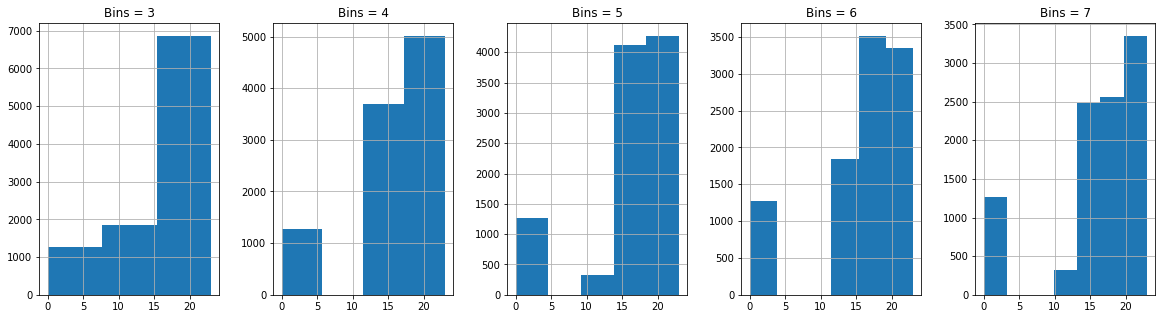

In [40]:
fig, axes = plt.subplots(1, 5,figsize=(20,5))
df.hist('Hour',bins=3,ax= axes[0])
df.hist('Hour',bins=4,ax= axes[1])
df.hist('Hour',bins=5,ax= axes[2])
df.hist('Hour',bins=6,ax= axes[3])
df.hist('Hour',bins=7,ax= axes[4])
axes[0].set_title('Bins = 3')
axes[1].set_title('Bins = 4')
axes[2].set_title('Bins = 5')
axes[3].set_title('Bins = 6')
axes[4].set_title('Bins = 7')


In [41]:
df['tramo_dia'] = int(0)
df.loc[(df['Hour'] <= 6),'tramo_dia'] = 1
df.loc[((df['Hour'] > 6) & (df['Hour'] < 15)),'tramo_dia'] = 2
df.loc[(df['Hour'] >= 15) & (df['Hour'] < 20),'tramo_dia'] = 3
df.loc[(df['Hour'] >= 20),'tramo_dia'] = 4
df.groupby('tramo_dia').agg({'order_id':'count'}).reset_index().sort_values(by=['tramo_dia'],ascending=False).head(10)

,tramo_dia,order_id
3,4,3350
2,3,4259
1,2,1100
0,1,1269


# Final Variables to be employed

In [42]:
df.columns

Index(['order_id', 'lat_cli', 'lng_cli', 'promised_time', 'on_demand',
       'shopper_id', 'store_branch_id', 'total_minutes', 'KG', 'UN',
       'seniority', 'found_rate', 'picking_speed', 'accepted_rate', 'rating',
       'new_seniority', 'store_id', 'lat_store', 'lng_store', 'distance_km',
       'new_store_id', 'tramo_dia', 'date', 'Hour', 'day'],
      dtype='object')

In [228]:
df_final = df.loc[:,['order_id','on_demand','KG','UN','new_seniority','found_rate','picking_speed',
                     'accepted_rate','rating','distance_km','tramo_dia','new_store_id','total_minutes']]

In [229]:
df_final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 0 to 9977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9978 non-null   object 
 1   on_demand      9978 non-null   bool   
 2   KG             9978 non-null   float64
 3   UN             9978 non-null   float64
 4   new_seniority  9978 non-null   int64  
 5   found_rate     9978 non-null   float64
 6   picking_speed  9978 non-null   float64
 7   accepted_rate  9978 non-null   float64
 8   rating         9978 non-null   float64
 9   distance_km    9978 non-null   float64
 10  tramo_dia      9978 non-null   int64  
 11  new_store_id   9978 non-null   float64
 12  total_minutes  7983 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 1.3+ MB


# Training the model

In [230]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [231]:
data = df_final[df_final['total_minutes'].isnull() != True]
train = data.iloc[:,1:12]
test = data.total_minutes
make_pred = df_final[df_final['total_minutes'].isnull() == True]
make_pred = make_pred.iloc[:,:12]

In [232]:
train.head()

,on_demand,KG,UN,new_seniority,found_rate,picking_speed,accepted_rate,rating,distance_km,tramo_dia,new_store_id
0,True,2.756,16.0,3,0.9024,1.30,0.92,4.76,1.823,4,1.0
1,True,2.900,63.0,3,0.9024,1.30,0.92,4.76,0.962,3,1.0
2,False,1.000,155.0,3,0.8909,1.17,0.96,5.00,1.652,3,1.0
3,False,7.646,115.0,3,0.8462,1.11,0.96,4.96,0.695,3,1.0
4,False,2.216,97.0,2,0.8138,1.89,0.84,4.68,3.316,1,1.0


In [233]:
test.head()

0     67.684264
1    160.336211
2    122.239210
3    133.113926
4     94.734479
Name: total_minutes, dtype: float64

In [234]:
make_pred.head()

,order_id,on_demand,KG,UN,new_seniority,found_rate,picking_speed,accepted_rate,rating,distance_km,tramo_dia,new_store_id
9,f629881954df817b768c981ad52c56ce,True,2.664,65.0,1,0.8671,2.50,1.00,5.00,0.915,3,1.0
11,4d322b65c5ff3c0ab5a68661fe499c33,True,0.000,54.0,3,0.8740,1.21,1.00,4.80,1.032,4,1.0
14,7ebab6283d87c169291afd709bd9b4d7,False,0.000,74.0,3,0.8827,1.50,1.00,4.44,4.099,3,1.0
16,123bb583303cacd65ae42cd85bdf7694,False,0.000,23.0,3,0.8447,1.41,0.88,4.92,1.799,3,1.0
24,f4b7a5bbd3582dc0fe1d85188e792860,False,0.000,8.0,3,0.8869,0.93,0.96,5.00,2.820,3,1.0


In [235]:
x_train, x_test, y_train, y_test = train_test_split(train,test, test_size = 0.3, random_state=123)
print('Train:' ,x_train.shape)
print('Test:' ,x_test.shape)

Train: (5588, 11)
Test: (2395, 11)


In [236]:
x_train[:3]

,on_demand,KG,UN,new_seniority,found_rate,picking_speed,accepted_rate,rating,distance_km,tramo_dia,new_store_id
1631,True,3.010,39.0,3,0.9074,1.34,1.00,4.92,4.955,4,1.0
1598,True,1.258,42.0,3,0.8752,1.18,0.92,4.92,7.401,1,1.0
2354,False,5.665,62.0,3,0.8861,1.26,1.00,4.84,1.330,3,1.0


In [237]:
norm = StandardScaler()

x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)
a = make_pred.iloc[:,1:]
make_pred_2 = norm.transform(a)

## Random Forest Regressor

In [281]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

rfg_model = RandomForestRegressor(n_estimators=20,
                                  random_state=123,
                                 max_depth= 20)
rfg_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=20, random_state=123)

In [282]:
y_pred_rgf = rfg_model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rgf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rgf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rgf)))

Mean Absolute Error: 20.462659532214115
Mean Squared Error: 721.9431801661086
Root Mean Squared Error: 26.86900035665839


Feature: 0, Score: 291.02071
Feature: 1, Score: 172.62678
Feature: 2, Score: 1191.28906
Feature: 3, Score: 20.02884
Feature: 4, Score: 242.94966
Feature: 5, Score: 459.08318
Feature: 6, Score: 75.61015
Feature: 7, Score: 92.68736
Feature: 8, Score: 302.68067
Feature: 9, Score: 137.79992
Feature: 10, Score: 59.42934


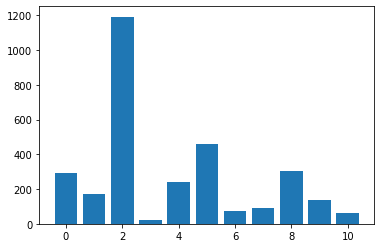

In [240]:
results = permutation_importance(rfg_model, x_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [241]:
rfg_model.fit(x_train[:,[0,1,2,4,5,8]], y_train)
y_pred_rgf = rfg_model.predict(x_test[:,[0,1,2,4,5,8]])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rgf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rgf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rgf)))

Mean Absolute Error: 20.596639366554424
Mean Squared Error: 724.7024754992937
Root Mean Squared Error: 26.920298577454403


Utilizaremos todas las variables, pero las mas relevantes para el modelo son on_demand, UN (# UN pedido), picking_speed y distance_km.

## SVR

In [287]:
from sklearn.svm import SVR

svr_model = SVR(C=10,epsilon=0.2)
svr_model.fit(x_train, y_train)

SVR(C=10, epsilon=0.2)

In [288]:
y_pred_svr = svr_model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

Mean Absolute Error: 19.550848645849925
Mean Squared Error: 702.4763781425099
Root Mean Squared Error: 26.504270941539026


Feature: 0, Score: 115.54259
Feature: 1, Score: 41.67324
Feature: 2, Score: 526.91008
Feature: 3, Score: 21.60008
Feature: 4, Score: 31.71167
Feature: 5, Score: 136.35097
Feature: 6, Score: 16.51508
Feature: 7, Score: 20.41387
Feature: 8, Score: 72.32923
Feature: 9, Score: 46.17453
Feature: 10, Score: 47.29410


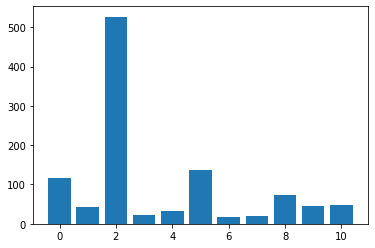

In [204]:
results = permutation_importance(svr_model, x_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [194]:
svr_model.fit(x_train[:,[0,2,5,8]], y_train)
y_pred_svr = svr_model.predict(x_test[:,[0,2,5,8]])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

Mean Absolute Error: 19.960071765382065
Mean Squared Error: 738.3742038285811
Root Mean Squared Error: 27.173041858220092


## Ridge Regression

In [289]:
from sklearn.linear_model import Ridge

r_model = Ridge(alpha=10)
r_model.fit(x_train, y_train)

Ridge(alpha=10)

In [290]:
y_pred_r = r_model.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_r))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_r))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

Mean Absolute Error: 20.23045336042372
Mean Squared Error: 700.8287014533914
Root Mean Squared Error: 26.473169463692695


Feature: 0, Score: 94.34294
Feature: 1, Score: 26.04541
Feature: 2, Score: 501.62691
Feature: 3, Score: 0.33700
Feature: 4, Score: 19.53662
Feature: 5, Score: 79.21492
Feature: 6, Score: 0.65218
Feature: 7, Score: -0.01759
Feature: 8, Score: 45.36585
Feature: 9, Score: 9.63778
Feature: 10, Score: 25.86743


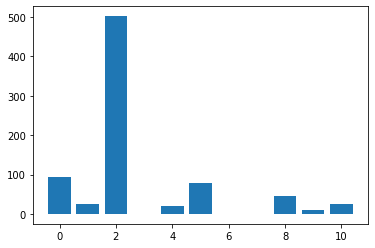

In [198]:
results = permutation_importance(r_model, x_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [201]:
r_model.fit(x_train[:,[0,1,2,4,5,8,9,10]], y_train)
y_pred_r = r_model.predict(x_test[:,[0,1,2,4,5,8,9,10]])

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_r))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_r))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

Mean Absolute Error: 20.362125734732746
Mean Squared Error: 708.4830371303673
Root Mean Squared Error: 26.617344667159557


## Elastic Net

In [306]:
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(alpha = 0.001) 
e_net.fit(x_train, y_train)

ElasticNet(alpha=0.001)

In [307]:
y_pred_el = e_net.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_el))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_el))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_el)))

Mean Absolute Error: 20.229412900269388
Mean Squared Error: 700.8269663450425
Root Mean Squared Error: 26.47313669259921


Feature: 0, Score: 97.82201
Feature: 1, Score: 23.42396
Feature: 2, Score: 463.44383
Feature: 3, Score: 0.16794
Feature: 4, Score: 20.96580
Feature: 5, Score: 82.50593
Feature: 6, Score: 1.18913
Feature: 7, Score: 0.02460
Feature: 8, Score: 44.05829
Feature: 9, Score: 9.55476
Feature: 10, Score: 39.62382


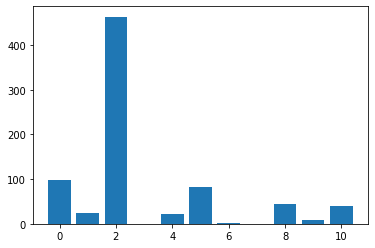

In [308]:
results = permutation_importance(e_net, x_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Errores del modelo

## Ridge Model

In [283]:
df_r = pd.DataFrame(y_pred_r,columns=['prediction'])
df_r['total_minutes'] =  y_test.tolist()
df_r['diferencia'] =  df_r.prediction - df_r.total_minutes
df_r.head()

,prediction,total_minutes,diferencia
0,67.882338,66.825070,1.057268
1,93.637873,127.002258,-33.364385
2,81.101655,62.860272,18.241382
3,91.394116,101.506607,-10.112491
4,58.306568,52.070097,6.236471


In [284]:
df_r['tramo_err'] = ''
df_r.loc[(df_r['diferencia'] <= -10),'tramo_err'] = '<= -10'
df_r.loc[(df_r['diferencia'] > -10) & (df_r['diferencia'] <= 10),'tramo_err'] = ']-10,10]'
df_r.loc[(df_r['diferencia'] > 10),'tramo_err'] = '> 10'
df_r.groupby('tramo_err').agg(['count','mean','std'])[['diferencia']]

diferencia                      
               count       mean        std
tramo_err                                 
<= -10           688 -32.218085  21.617910
> 10             979  23.484503   9.821068
]-10,10]         728   0.478884   5.675853

## SVR

In [285]:
df_svr = pd.DataFrame(y_pred_svr,columns=['prediction'])
df_svr['total_minutes'] =  y_test.tolist()
df_svr['diferencia'] =  df_r.prediction - df_r.total_minutes
df_svr.head()

,prediction,total_minutes,diferencia
0,79.003181,66.825070,1.057268
1,81.071620,127.002258,-33.364385
2,78.461495,62.860272,18.241382
3,82.250937,101.506607,-10.112491
4,58.137814,52.070097,6.236471


In [278]:
df_svr['tramo_err'] = ''
df_svr.loc[(df_svr['diferencia'] <= -10),'tramo_err'] = '<= -10'
df_svr.loc[(df_svr['diferencia'] > -10) & (df_svr['diferencia'] <= 10),'tramo_err'] = ']-10,10]'
df_svr.loc[(df_svr['diferencia'] > 10),'tramo_err'] = '> 10'
df_svr.groupby('tramo_err').agg(['count','mean','std'])[['diferencia']]

diferencia                      
               count       mean        std
tramo_err                                 
<= -10           688 -32.218085  21.617910
> 10             979  23.484503   9.821068
]-10,10]         728   0.478884   5.675853

## Elastic

In [309]:
df_svr = pd.DataFrame(y_pred_el,columns=['total_minutes'])
df_svr['prediction'] =  y_test.tolist()
df_svr['diferencia'] =  df_r.total_minutes - df_r.prediction
df_svr.head()

,total_minutes,prediction,diferencia
0,69.756522,66.825070,-1.057268
1,93.528707,127.002258,33.364385
2,80.977500,62.860272,-18.241382
3,91.248815,101.506607,10.112491
4,60.196600,52.070097,-6.236471


# Final Prediction

In [291]:
make_pred_2 = norm.fit_transform(make_pred.iloc[:,1:])
y_pred_r = svr_model.predict(make_pred_2)

make_pred['prediction'] = y_pred_r
make_pred.head()

,order_id,on_demand,KG,UN,new_seniority,found_rate,picking_speed,accepted_rate,rating,distance_km,tramo_dia,new_store_id,prediction
9,f629881954df817b768c981ad52c56ce,True,2.664,65.0,1,0.8671,2.50,1.00,5.00,0.915,3,1.0,110.516058
11,4d322b65c5ff3c0ab5a68661fe499c33,True,0.000,54.0,3,0.8740,1.21,1.00,4.80,1.032,4,1.0,62.711290
14,7ebab6283d87c169291afd709bd9b4d7,False,0.000,74.0,3,0.8827,1.50,1.00,4.44,4.099,3,1.0,104.166374
16,123bb583303cacd65ae42cd85bdf7694,False,0.000,23.0,3,0.8447,1.41,0.88,4.92,1.799,3,1.0,74.679683
24,f4b7a5bbd3582dc0fe1d85188e792860,False,0.000,8.0,3,0.8869,0.93,0.96,5.00,2.820,3,1.0,61.376928


In [292]:
pred = make_pred[['order_id','prediction']]
pred.to_csv('final_predictions.csv')